In [1]:
#%reset
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from medangel.data import preprocessing
from medangel.models import model_builder
from medangel.features import feature_creation

df = preprocessing.load_relevant_data()

In [2]:
df_transformed = df
df_transformed["temperature"] = df_transformed["temperature"].apply(lambda x: max(2,min(10,x)))


In [3]:
df = preprocessing.load_relevant_data()

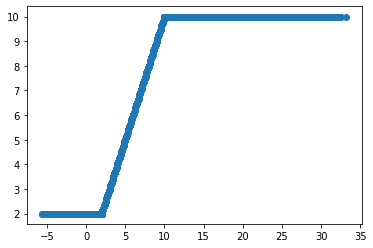

In [4]:
import matplotlib.pyplot as plt

plt.scatter(x = df["temperature"],y = df_transformed["temperature"])


In [5]:
df

doy_id  temperature            datetime      time
0       31948:201913         20.3 2019-01-13 04:59:02  04:59:02
1       31948:201913         20.3 2019-01-13 05:02:01  05:02:01
2       31948:201913         20.3 2019-01-13 05:05:00  05:05:00
3       31948:201913         20.3 2019-01-13 05:07:59  05:07:59
4       31948:201913         20.3 2019-01-13 05:10:58  05:10:58
...              ...          ...                 ...       ...
515934  31948:201913         20.4 2019-01-13 04:44:07  04:44:07
515935  31948:201913         20.4 2019-01-13 04:47:06  04:47:06
515936  31948:201913         20.3 2019-01-13 04:50:05  04:50:05
515937  31948:201913         20.3 2019-01-13 04:53:04  04:53:04
515938  31948:201913         20.3 2019-01-13 04:56:03  04:56:03

[497434 rows x 4 columns]

Feature Extraction: 100%|██████████| 30/30 [00:05<00:00,  5.37it/s]


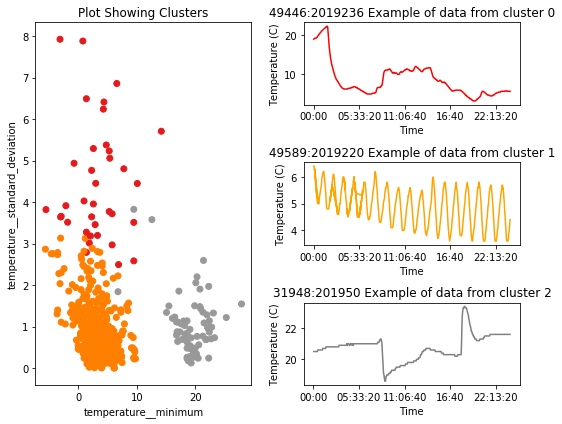

Feature Extraction: 100%|██████████| 30/30 [00:06<00:00,  4.91it/s]


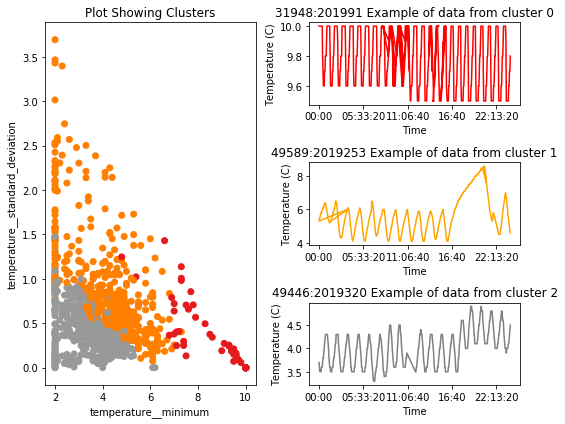

In [6]:
from medangel.visualization import viz_creation
viz_creation.create_multiple_figure(df)
viz_creation.create_multiple_figure(df_transformed)

In [7]:
minimum_features = feature_creation.extract_minimum_features(df_transformed)

Feature Extraction: 100%|██████████| 30/30 [00:05<00:00,  5.06it/s]


In [8]:
kmeans_minimum,scaled_minimum = model_builder.kmeans_clustering(minimum_features)

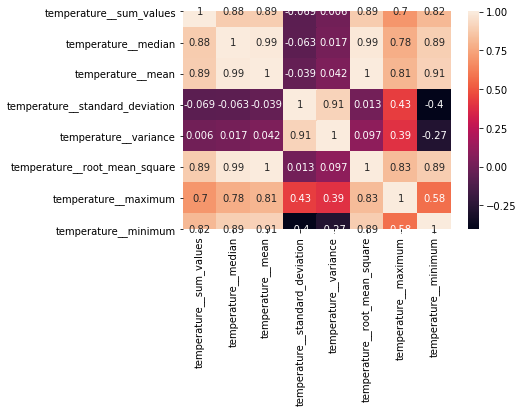

In [9]:
viz_creation.create_heatmap(minimum_features)

In [10]:
scaled_df = pd.DataFrame(scaled_minimum, columns = minimum_features.columns)
covMatrix = pd.DataFrame.cov(scaled_df)
abs(covMatrix).stack().idxmin()

('temperature__sum_values', 'temperature__variance')

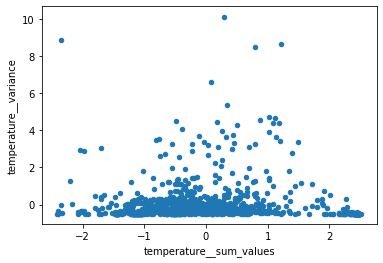

In [11]:
scaled_df.plot.scatter(x='temperature__sum_values',y='temperature__variance')